In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


C:\Users\Dario\AppData\Local\Temp\ipykernel_5432\4147300727.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ev = pd.read_csv('ia_data_events.csv')


array([[<Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'isMoving'}>],
       [<Axes: title={'center': 'isPumpOn'}>,
        <Axes: title={'center': 'pressure'}>]], dtype=object)

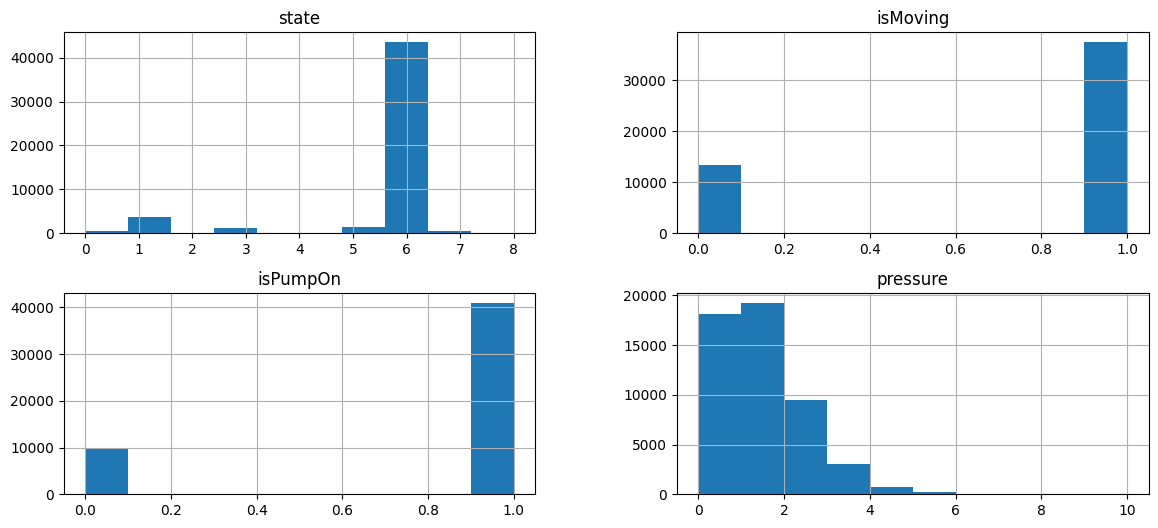

In [37]:
df_ev = pd.read_csv('ia_data_events.csv')
df_ev['isMoving'] = df_ev['isMoving'].astype(int)
df_ev['isPumpOn'] = df_ev['isPumpOn'].astype(int)
df_ev.hist(column=['state', 'isMoving', 'isPumpOn', 'pressure'], figsize=(14, 6))


array([[<Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'isMoving'}>],
       [<Axes: title={'center': 'isPumpOn'}>,
        <Axes: title={'center': 'pressure'}>]], dtype=object)

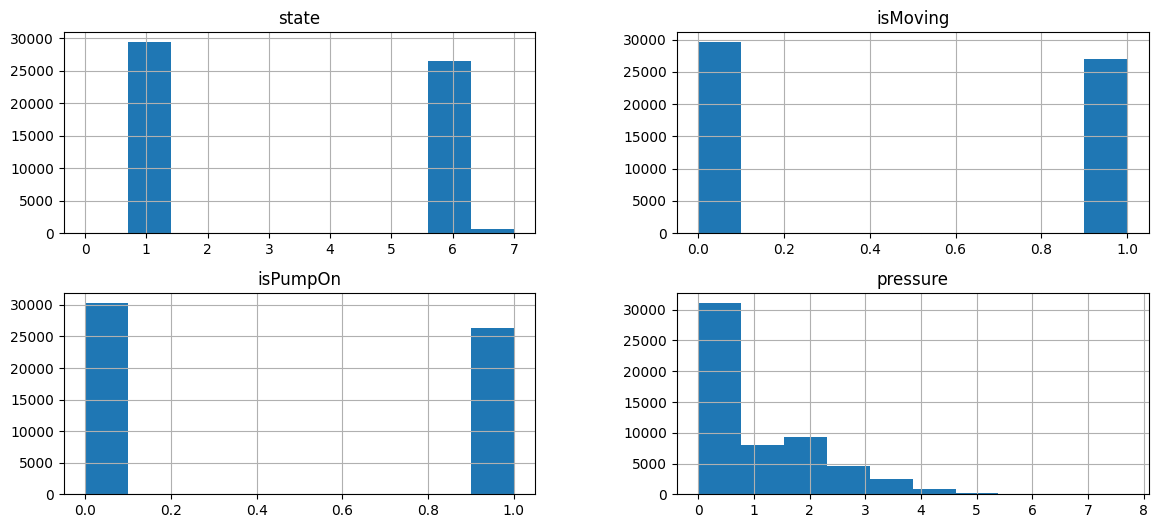

In [38]:
df_nf = pd.read_csv('ia_data_no_fails.csv')
df_nf['isMoving'] = df_nf['isMoving'].astype(int)
df_nf['isPumpOn'] = df_nf['isPumpOn'].astype(int)
df_nf.hist(column=['state', 'isMoving', 'isPumpOn', 'pressure'], figsize=(14, 6))

In [52]:
ALARM_PUMP = 3
ALARM_EQUIPMENT = 5

def prepare_data (df):
  gb = df.groupby('intervalGroup')    
  train = []
  test = []
  for x in gb.groups:
    train_group = gb.get_group(x).drop(
      ['intervalGroup', 'timeToFail', 'deviceId', 'messageId', 'Time'],
      axis=1
    )
    train_group['direction'] = train_group['direction'].apply(lambda x: 1 if x == 'F' else -1 if x == 'R' else 0)
    train.append(train_group.to_numpy())

    test_group = gb.get_group(x)[['timeToFail']].copy()
    last_state = train_group['state'].iloc[-1]
    test_group['pe'] = 1 if last_state == ALARM_EQUIPMENT else 0
    test_group['pp'] = 1 if last_state == ALARM_PUMP else 0
    test.append(test_group.to_numpy())
  return train, test


In [53]:
ev_x, ev_y = prepare_data(df_ev)
nf_x, nf_y = prepare_data(df_nf)

In [63]:
data_x = ev_x + nf_x
data_y = ev_y + nf_y

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.15, random_state=42)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4518
798
4518
798
